In [1]:
#Importing packages
import pandas as pd
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import folium
from folium import plugins
from folium.features import DivIcon
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
import plotly.plotly as py
import plotly.graph_objs as go
from scipy.stats import norm
col=['black','red','purple','blue','green']

#Function to display multiple data frame in single output
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    
#Query Executer
def getRes(query):
    df = pd.read_sql(query, con=db)
    return df

In [2]:
#DB Connection
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='MyNewPass', db='chicagotaxidb')



In [3]:
trip_Sec_Data = getRes('select * from trip_min_c;')

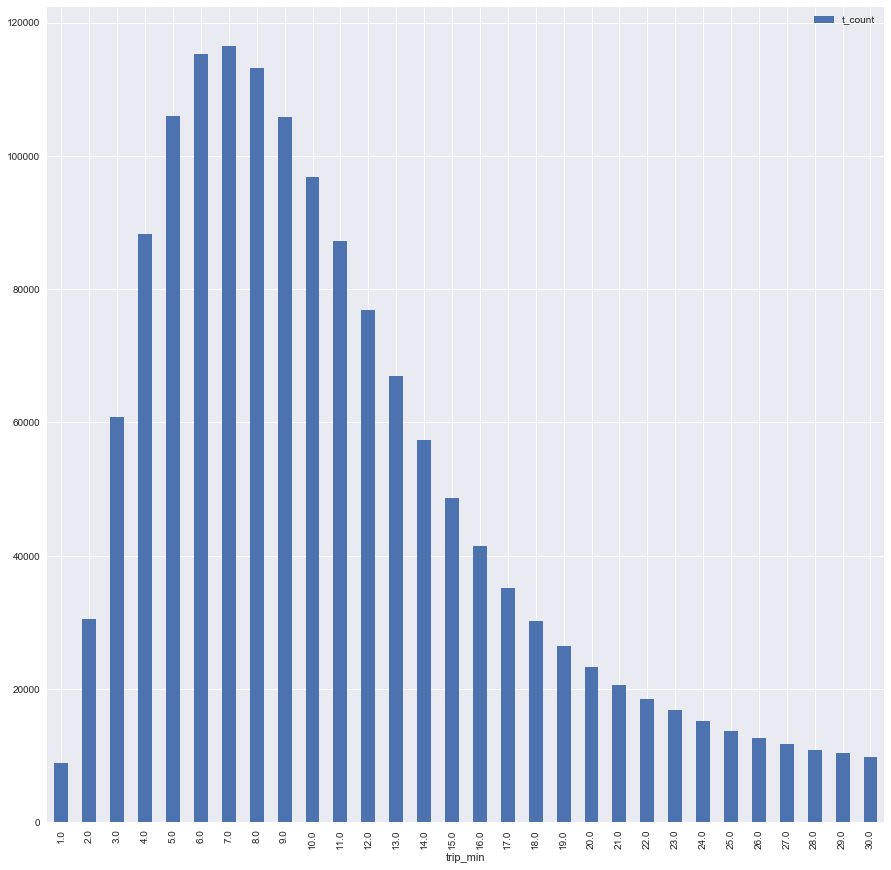

In [83]:
trip_Sec_Data[:30].plot(x='trip_min',y='t_count',kind='bar',figsize=(15,15))
plt.show()

In [10]:
trip_Sec_Data.describe()

,trip_min,t_count
count,60.000000,60.000000
mean,30.500000,27113.650000
std,17.464249,34841.114233
min,1.000000,2037.000000
25%,15.750000,4740.250000
50%,30.500000,9126.000000
75%,45.250000,31689.750000
max,60.000000,116538.000000


In [11]:
trip_norm = trip_Sec_Data.copy()

In [38]:
trip_norm['t_Norm'] = (trip_norm['t_count'] - 372025.883333)/255523.065067

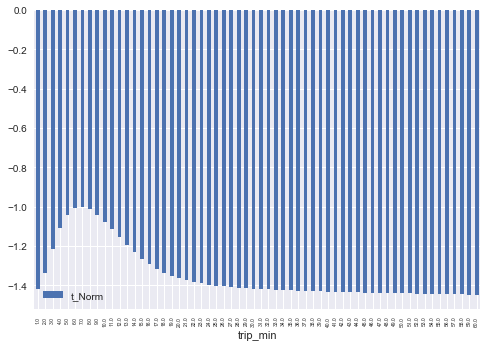

In [39]:
trip_norm.plot(x='trip_min',y='t_Norm',kind='bar')
plt.show()

In [34]:
trip_norm['x'] = trip_norm['t_count'] * trip_norm['trip_min']

In [52]:
tripData = getRes("select trip_seconds from c_taxi")

In [45]:
tripData.describe()[1:]

,trip_seconds/60
mean,13.720981
std,11.092016
min,1.000000
25%,6.000000
50%,10.000000
75%,16.000000
max,60.000000


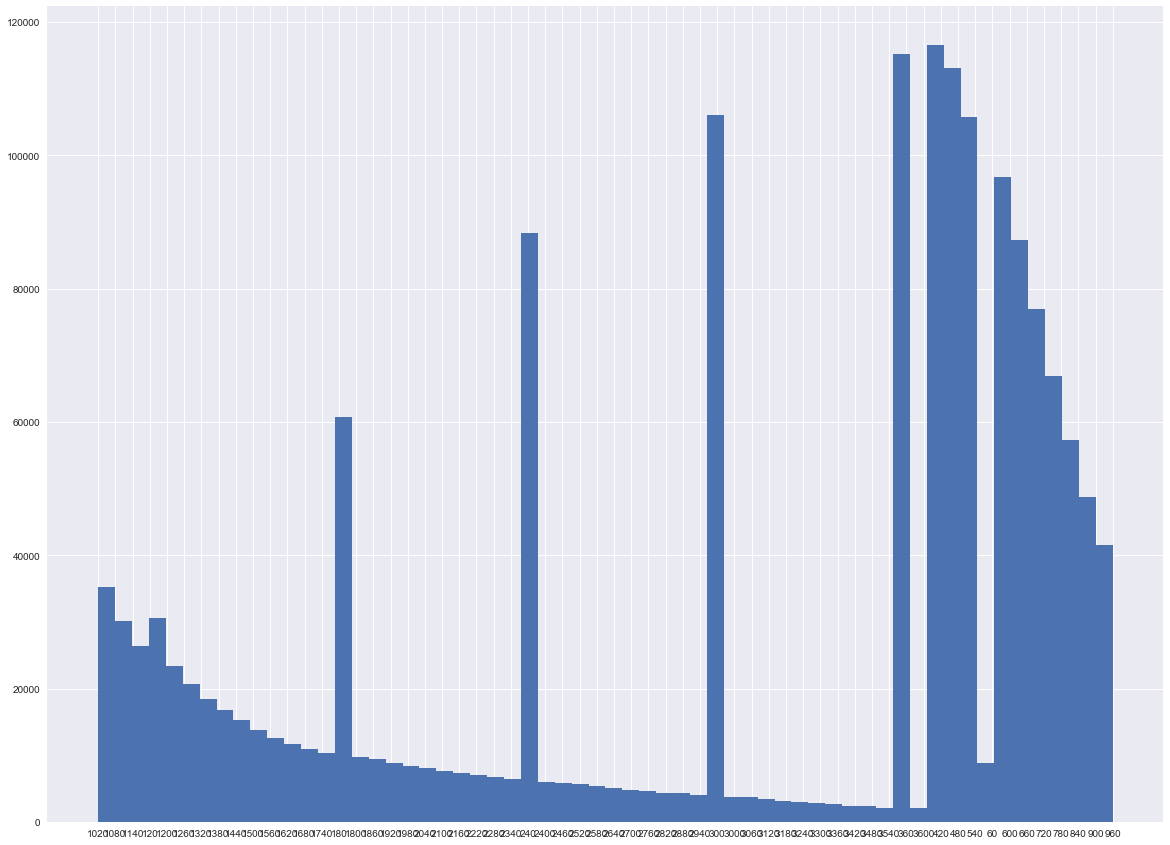

In [61]:
fig = plt.figure(figsize=(20,15))
plt.hist(tripData, bins=60)
plt.rc('xtick', labelsize=10,)
plt.show()

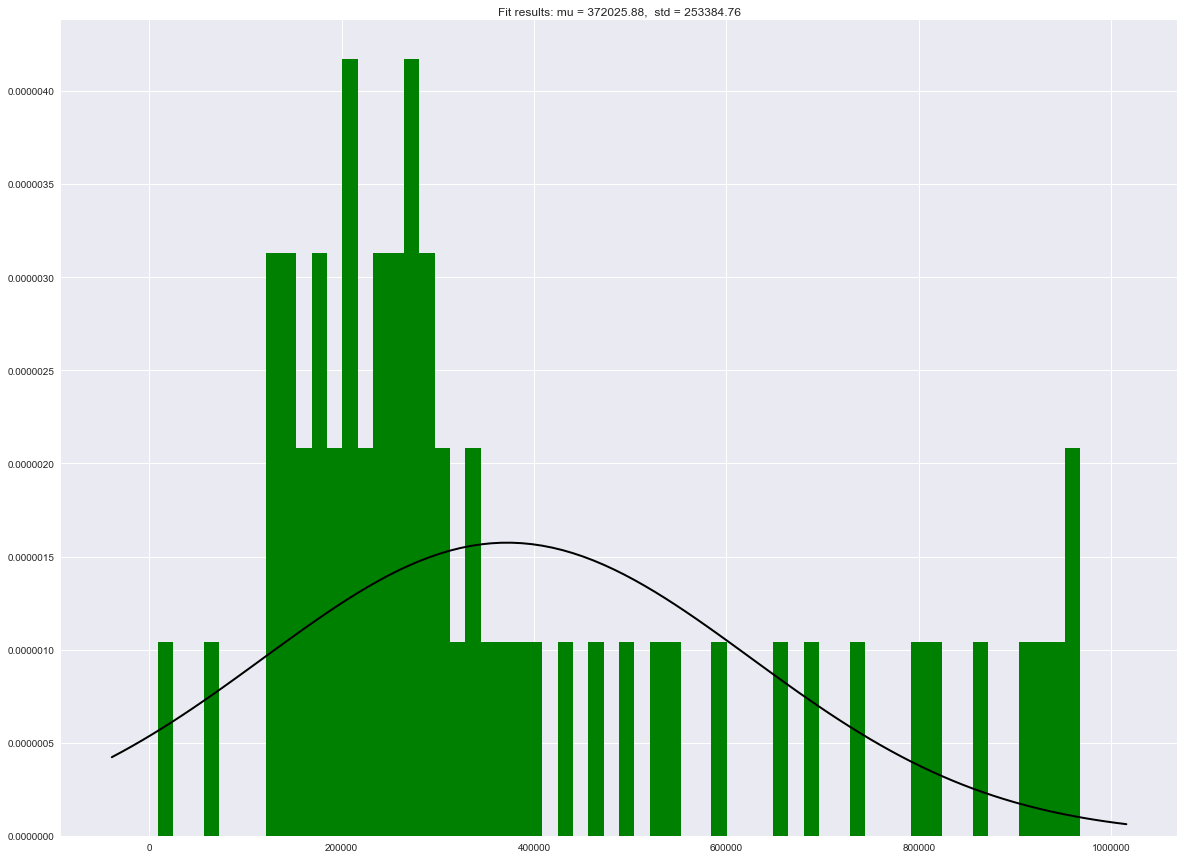

In [92]:

fig = plt.figure(figsize=(20,15))
# Generate some data for this demonstration.
data = trip_norm['x']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins= 60,normed=True, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [12]:
#Q3

q3_14_Query = '''
select Pickup_Community_Area, avg(Trip_Seconds)/60 as avg_duration_14,count(1) as trips_14 from c_taxi where 
Dropoff_Community_Area = 8 
and hour(Trip_End_Timestamp) = 14
group by Pickup_Community_Area
'''

q3_all_Query = '''
select Pickup_Community_Area, (avg(Trip_Seconds)/60) as avg_duration_all,count(1) as trips_all from c_taxi where 
Dropoff_Community_Area = 8 
group by Pickup_Community_Area
'''

q3_all = getRes(q3_all_Query)
#q3_14 = getRes(q3_14_Query)


In [16]:
import math
leave_times  = []
all_area_times = q3_all['avg_duration_all']
for i in range(len(q3_all['avg_duration_all'])):
    temp = 60.0
    temp = temp - all_area_times[i]
    t = "1:" + str(math.floor(temp)) + " PM"
    leave_times.append(t)
leave_times
q3_all['Time_to_leave'] = leave_times
q3_all

,Pickup_Community_Area,avg_duration_all,trips_all,Time_to_leave
0,1,23.359184,245,1:36 PM
1,2,26.473684,133,1:33 PM
2,3,14.877414,2227,1:45 PM
3,4,23.573427,286,1:36 PM
4,5,20.631929,451,1:39 PM
5,6,14.863714,16326,1:45 PM
6,7,10.136707,18119,1:49 PM
7,8,6.660685,193997,1:53 PM
8,9,30.000000,2,1:30 PM
9,10,26.166667,18,1:33 PM


In [4]:
q3 = pd.merge(q3_all,q3_14,how='outer')

In [5]:
q3

,Pickup_Community_Area,avg_duration_all,trips_all,avg_duration_14,trips_14
0,1,23.359184,245,20.909091,11.0
1,2,26.473684,133,20.333333,3.0
2,3,14.877414,2227,15.053763,93.0
3,4,23.573427,286,21.400000,10.0
4,5,20.631929,451,21.166667,12.0
5,6,14.863714,16326,12.894515,474.0
6,7,10.136707,18119,10.236842,798.0
7,8,6.660685,193997,6.735603,9898.0
8,9,30.000000,2,NaN,NaN
9,10,26.166667,18,38.000000,1.0


In [78]:
q3['diff'] = abs(q3['avg_duration_all'] - q3['avg_duration_14'])

In [82]:
q3.describe()

,Pickup_Community_Area,avg_duration_all,trips_all,avg_duration_14,trips_14,diff
count,68.000000,68.000000,68.000000,41.000000,41.000000,41.000000
mean,35.852941,25.577362,7543.117647,24.746498,696.024390,3.257375
std,21.542228,8.831572,30444.478884,10.420176,2194.293343,3.760721
min,1.000000,6.660685,1.000000,6.735603,1.000000,0.000000
25%,17.750000,19.119905,5.750000,18.400000,2.000000,0.597302
50%,34.500000,25.464286,16.000000,21.400000,9.000000,1.969200
75%,54.500000,32.025000,282.250000,34.500000,93.000000,4.980392
max,77.000000,53.000000,193997.000000,45.000000,10026.000000,18.214286


In [93]:
db.close()

In [18]:
tma = getRes('select * from trip_min_all;')


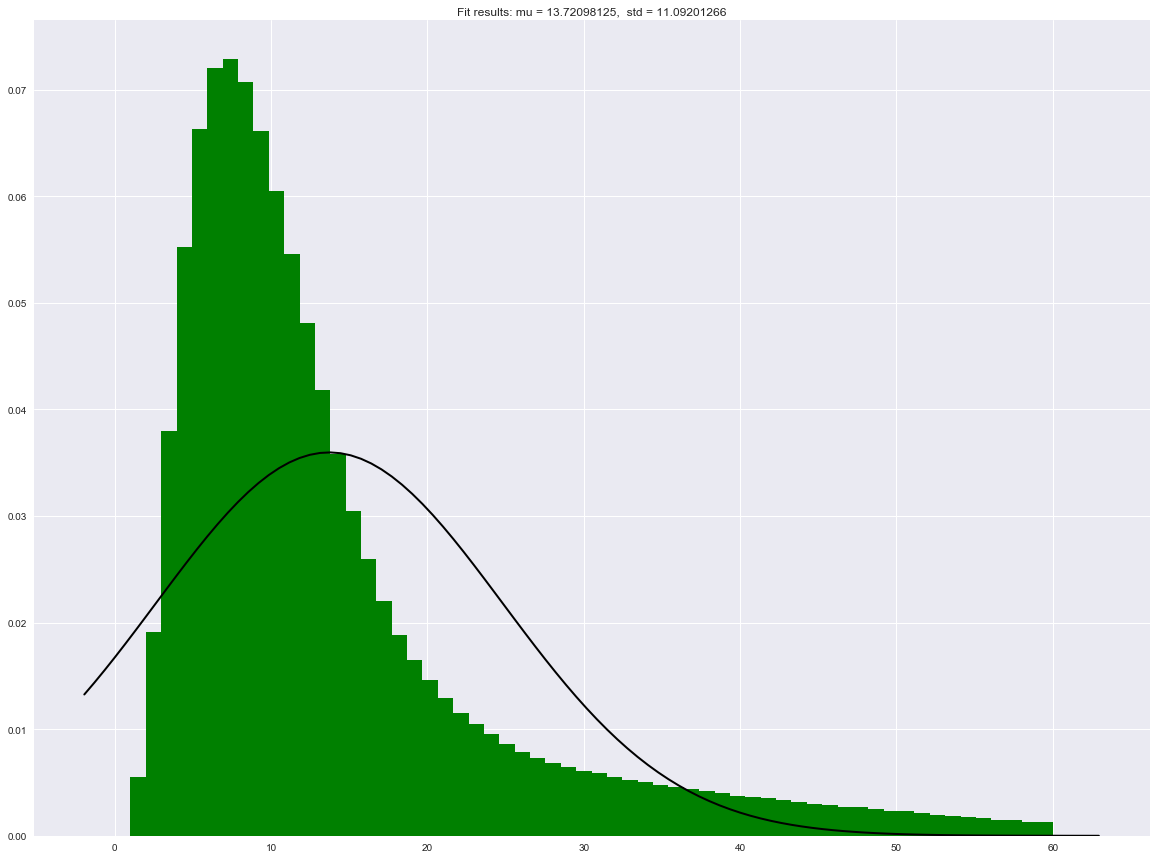

In [20]:

fig = plt.figure(figsize=(20,15))
# Generate some data for this demonstration.
data = tma['trip_min']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins= 60,normed=True, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.8f,  std = %.8f" % (mu, std)
plt.title(title)

plt.show()

In [21]:
#Q3
all_areas = list(set(q3_all['Pickup_Community_Area']))
modes = []
freq = []
avgs = []
l = []
for i in range(len(all_areas)):
    query = 'select Trip_Seconds/60 from c_taxi where Pickup_Community_Area = ' +str(all_areas[i]) +' and Dropoff_Community_Area = 8;'
    d = getRes(query)
    x = d['Trip_Seconds/60'].value_counts()
    modes.append(x.index[0])
    freq.append(x[x.index[0]])
    avgs.append(sum(d['Trip_Seconds/60'])/len(d))
    l.append(len(d))

methods = []    
final = []
for i in range(len(freq)):
    if freq[i] <= 10:
        final.append(math.floor(avgs[i]))
        methods.append('Average')
    else:
        final.append(modes[i])
        methods.append('Mode')

leave_times = []
for i in range(len(all_area_times)):
    temp = 60.0
    temp = temp - final[i]
    t = "1:" + str(math.floor(temp))
    leave_times.append(t)

data = pd.DataFrame({'Area':all_areas,'Time to Reach':final,'Leaving Time':leave_times,'Method':methods})

In [22]:
data

,Area,Leaving Time,Method,Time to Reach
0,1,1:41,Mode,19.0
1,2,1:34,Average,26.0
2,3,1:49,Mode,11.0
3,4,1:39,Mode,21.0
4,5,1:43,Mode,17.0
5,6,1:49,Mode,11.0
6,7,1:51,Mode,9.0
7,8,1:55,Mode,5.0
8,9,1:30,Average,30.0
9,10,1:34,Average,26.0


In [23]:
pickCo = getRes('select * from pickup_location')

In [25]:
pickName = getRes('select * from community')

In [27]:
pickCo

,Pickup_Community_Area,Avg_P_Lat,Avg_P_Long
0,1,42.009506,-87.670208
1,2,42.001556,-87.695008
2,3,41.965685,-87.655717
3,4,41.975091,-87.687479
4,5,41.947840,-87.683792
5,6,41.944255,-87.654804
6,7,41.921586,-87.645630
7,8,41.896073,-87.628055
8,9,42.007613,-87.813781
9,10,41.984981,-87.804514


In [29]:
comm_Meta = pd.merge(pickCo,pickName,left_on='Pickup_Community_Area',right_on='Community_Area')

In [32]:
finalData = pd.merge(data,comm_Meta,left_on='Area',right_on='Community_Area')

In [33]:
finalData

,Area,Leaving Time,Method,Time to Reach,Pickup_Community_Area,Avg_P_Lat,Avg_P_Long,Community_Name,Community_Area
0,1,1:41,Mode,19.0,1,42.009506,-87.670208,Rogers Park,1
1,2,1:34,Average,26.0,2,42.001556,-87.695008,West Ridge,2
2,3,1:49,Mode,11.0,3,41.965685,-87.655717,Uptown,3
3,4,1:39,Mode,21.0,4,41.975091,-87.687479,Lincoln Square,4
4,5,1:43,Mode,17.0,5,41.947840,-87.683792,North Center,5
5,6,1:49,Mode,11.0,6,41.944255,-87.654804,Lake View,6
6,7,1:51,Mode,9.0,7,41.921586,-87.645630,Lincoln Park,7
7,8,1:55,Mode,5.0,8,41.896073,-87.628055,Near North Side,8
8,9,1:30,Average,30.0,9,42.007613,-87.813781,Edison Park,9
9,10,1:34,Average,26.0,10,41.984981,-87.804514,Norwood Park,10


In [56]:
def getTaxiFlow(data):
    m = folium.Map(location=[41.881832,-87.623177],zoom_start=10)
    attr = {'fill': '#007DEF', 'font-weight': 'bold', 'font-size': '24'}

    #col = ["#00ffff","#00e5e5","#00cccc","#00b2b2","#009999",]
    #col = ["#FF0000","#FF6600","#FFEE00","#99FF00","#00FF00"]
    for dt in range(len(data)):
        tempdt = data.iloc[dt]
        
        latLongdata = [[float(tempdt['Avg_P_Lat']), float(tempdt['Avg_P_Long'])],[41.896073,-87.628055]]
        folium.PolyLine(latLongdata,color = 'black'
        ).add_to(m)
        #pickup
        popText = str(str(tempdt["Community_Name"]) + " Time to leave :" + str(tempdt['Leaving Time']) + " Duration : " + str(tempdt['Time to Reach']))
        folium.Marker(
        location = [float(tempdt['Avg_P_Lat']), float(tempdt['Avg_P_Long'])],
        popup = popText,
        icon = folium.Icon(color = "red")
        ).add_to(m)
    #Dropoff
    folium.Marker(
    location =  [41.896073,-87.628055],
    popup = "Near North Side",
    icon = folium.Icon(color = "green")
    ).add_to(m)

        #folium.RegularPolygonMarker(location=(latLong[1][0], latLong[1][1]), fill_color='black', number_of_sides=10, radius=5).add_to(m)
        #folium.RegularPolygonMarker(location=(latLong[0][0], latLong[0][1]), fill_color='white', number_of_sides=10, radius=5).add_to(m)
    return m

In [57]:
getTaxiFlow(finalData)

In [55]:
m = folium.Map(location=[41.881832,-87.623177],zoom_start=10)
attr = {'fill': '#007DEF', 'font-weight': 'bold', 'font-size': '24'}

#col = ["#00ffff","#00e5e5","#00cccc","#00b2b2","#009999",]
#col = ["#FF0000","#FF6600","#FFEE00","#99FF00","#00FF00"]
#for dt in range(len(data)):
tempdt = finalData.iloc[1]
print(tempdt)
latLongdata = [[float(tempdt['Avg_P_Lat']), float(tempdt['Avg_P_Long'])],
 [41.896073,-87.628055]]
folium.PolyLine(latLongdata,color = 'black'
).add_to(m)
#pickup
popText = str(str(tempdt["Community_Name"]) + " Time to leave :" + str(tempdt['Leaving Time']) + " Duration : " + str(tempdt['Time to Reach']))
folium.Marker(
location = [float(tempdt['Avg_P_Lat']), float(tempdt['Avg_P_Long'])],
popup = popText,
icon = folium.Icon(color = "red")
).add_to(m)
#Dropoff
folium.Marker(
location =  [41.896073,-87.628055],
popup = "Near North Side",
icon = folium.Icon(color = "green")
).add_to(m)
m

Area                               2
Leaving Time                    1:34
Method                       Average
Time to Reach                     26
Pickup_Community_Area              2
Avg_P_Lat                    42.0016
Avg_P_Long                   -87.695
Community_Name           West Ridge 
Community_Area                     2
Name: 1, dtype: object
